# Buy Prediction Algorithm NZD-USD
This notebook aims to minimize the clasification loss between No Action and Buy Action

### Imports

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Constants

In [19]:
ticker = "NZDUSD=X"
supporting_predictor_names = [
    'RAW-EMA-2',
    'RAW-EMA-3',
    'RAW-EMA-5',
    'RAW-EMA-7',
    'RAW-EMA-21',
    'RAW-EMA-50'
]

## Pre Algorithm

### Read Dataset

In [20]:
predictors = pd.read_csv('./' + ticker + '_input_signals.csv')
predictors_list = list(predictors.columns)
supporting_predictors = predictors[supporting_predictor_names]
predictors = predictors.drop(supporting_predictor_names, axis = 1)
predictors

,Open,High,Low,Close,Adj Close,Volume,diff-day-1,diff-day-2,diff-day-3,diff-day-4,...,EMA-7,EMA-21,EMA-50,RSI,MACD,ADX,STD,bb_width,bb_buy,bb_sell
0,0.621504,0.623791,0.618506,0.619809,0.619809,0,-0.001695,-0.006208,-0.002933,-0.005777,...,-0.002277,0.000298,-0.000909,0.515714,0.001007,0.154273,0.002375,0.009498,-0.008072,-0.001426
1,0.619617,0.620001,0.614817,0.618582,0.618582,0,-0.001227,-0.002922,-0.007435,-0.004160,...,-0.002628,-0.000845,-0.002052,0.500428,0.000573,0.146584,0.002571,0.010285,-0.008291,-0.001994
2,0.618697,0.620232,0.616105,0.619310,0.619310,0,0.000728,-0.000499,-0.002194,-0.006707,...,-0.001425,-0.000106,-0.001272,0.509713,0.000313,0.138918,0.002666,0.010664,-0.007066,-0.003597
3,0.619195,0.621002,0.615915,0.620617,0.620617,0,0.001307,0.002035,0.000808,-0.000887,...,-0.000089,0.001091,0.000033,0.526721,0.000212,0.129965,0.001016,0.004063,-0.001379,-0.002684
4,0.620617,0.622781,0.616599,0.622394,0.622394,0,0.001777,0.003084,0.003812,0.002585,...,0.001266,0.002608,0.001739,0.549598,0.000245,0.123905,0.001306,0.005225,-0.000361,-0.004864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,0.704002,0.705430,0.702500,0.704052,0.704052,0,-0.000088,-0.003287,-0.003098,-0.002947,...,0.000200,0.008570,0.020727,0.676821,-0.000012,0.443293,0.001506,0.006025,-0.004897,-0.001129
3718,0.704072,0.709512,0.703700,0.704072,0.704072,0,0.000020,-0.000068,-0.003267,-0.003078,...,0.000165,0.007809,0.019934,0.677012,-0.000312,0.448389,0.001548,0.006191,-0.004374,-0.001817
3719,0.701740,0.708421,0.701538,0.701641,0.701641,0,-0.002430,-0.002411,-0.002499,-0.005697,...,-0.001699,0.004889,0.016817,0.627907,-0.000714,0.445866,0.001813,0.007251,-0.006233,-0.001018
3720,0.709280,0.711101,0.707559,0.709401,0.709401,0,0.007760,0.005329,0.005349,0.005261,...,0.004545,0.011499,0.023613,0.702180,-0.000507,0.446968,0.002553,0.010210,-0.000365,-0.009845


In [21]:
target = pd.read_csv('./' + ticker + '_output_signals.csv')
#target

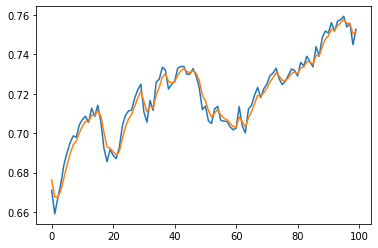

In [22]:
adj_close = predictors["Adj Close"].to_numpy()[1000:1100]
ema = supporting_predictors["RAW-EMA-3"].to_numpy()[1000:1100]

plt.plot(adj_close)
plt.plot(ema)

### Train Test Split

In [24]:
from sklearn.model_selection import train_test_split
train_predictors, test_predictors, train_targets, test_targets = train_test_split(
        predictors,
        target,
        test_size=0.20,
        random_state=42,
        shuffle=False
)

In [23]:
train_predictors

,Open,High,Low,Close,Adj Close,Volume,diff-day-1,diff-day-2,diff-day-3,diff-day-4,...,EMA-7,EMA-21,EMA-50,RSI,MACD,ADX,STD,bb_width,bb_buy,bb_sell
0,0.621504,0.623791,0.618506,0.619809,0.619809,0,-0.001695,-0.006208,-0.002933,-0.005777,...,-0.002277,0.000298,-0.000909,0.515714,0.001007,0.154273,0.002375,0.009498,-0.008072,-0.001426
1,0.619617,0.620001,0.614817,0.618582,0.618582,0,-0.001227,-0.002922,-0.007435,-0.004160,...,-0.002628,-0.000845,-0.002052,0.500428,0.000573,0.146584,0.002571,0.010285,-0.008291,-0.001994
2,0.618697,0.620232,0.616105,0.619310,0.619310,0,0.000728,-0.000499,-0.002194,-0.006707,...,-0.001425,-0.000106,-0.001272,0.509713,0.000313,0.138918,0.002666,0.010664,-0.007066,-0.003597
3,0.619195,0.621002,0.615915,0.620617,0.620617,0,0.001307,0.002035,0.000808,-0.000887,...,-0.000089,0.001091,0.000033,0.526721,0.000212,0.129965,0.001016,0.004063,-0.001379,-0.002684
4,0.620617,0.622781,0.616599,0.622394,0.622394,0,0.001777,0.003084,0.003812,0.002585,...,0.001266,0.002608,0.001739,0.549598,0.000245,0.123905,0.001306,0.005225,-0.000361,-0.004864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,0.711389,0.721397,0.706115,0.711389,0.711389,0,0.002049,0.004421,0.008140,0.008589,...,0.005383,0.011778,0.012642,0.702257,0.001591,0.269600,0.003351,0.013403,-0.002062,-0.011341
2973,0.708918,0.713089,0.708898,0.708818,0.708818,0,-0.002572,-0.000523,0.001849,0.005568,...,0.002108,0.008369,0.009676,0.649917,0.001377,0.291316,0.002741,0.010965,-0.004618,-0.006347
2974,0.710071,0.711389,0.707469,0.710021,0.710021,0,0.001203,-0.001369,0.000680,0.003052,...,0.002483,0.008702,0.010452,0.662584,0.001218,0.306916,0.001453,0.005811,-0.002193,-0.003619
2975,0.708848,0.715129,0.707569,0.709019,0.709019,0,-0.001002,0.000201,-0.002371,-0.000322,...,0.001111,0.007000,0.009080,0.641756,0.000959,0.324997,0.000930,0.003721,-0.002559,-0.001162


### More Preprocessing

In [25]:
train_targets = np.ravel(train_targets)
test_targets = np.ravel(test_targets)

### Utility

## Algorithm 3 - Neural Networks

In [27]:
# Imports
import keras
from keras import models
from keras import layers

In [39]:
# Training Validation Split
the_train_predictors, test_validation_predictors, the_train_targets, test_validation_targets = train_test_split(
        train_predictors,
        train_targets,
        test_size=0.20,
        random_state=42,
        shuffle=False
)

In [40]:
print("Features : " + str(train_predictors.shape[1]))

Features : 24


In [131]:
model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(train_predictors.shape[1],)))
model.add(layers.Dense(80, activation='relu', input_shape=(train_predictors.shape[1],)))
model.add(layers.Dense(60, activation='relu', input_shape=(train_predictors.shape[1],)))
model.add(layers.Dense(30, activation='relu', input_shape=(train_predictors.shape[1],)))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [132]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [133]:
history = model.fit(
    the_train_predictors,
    the_train_targets,
    epochs=20,
    batch_size=512,
    validation_data=(test_validation_predictors, test_validation_targets)
)

Epoch 1/20
5/5 [==============================] - 3s 152ms/step - loss: 0.6245 - accuracy: 0.9006 - val_loss: 0.4707 - val_accuracy: 0.9027
Epoch 2/20
5/5 [==============================] - 0s 12ms/step - loss: 0.4214 - accuracy: 0.9141 - val_loss: 0.3444 - val_accuracy: 0.9027
Epoch 3/20
5/5 [==============================] - 0s 15ms/step - loss: 0.3174 - accuracy: 0.9106 - val_loss: 0.3129 - val_accuracy: 0.9027
Epoch 4/20
5/5 [==============================] - 0s 13ms/step - loss: 0.3049 - accuracy: 0.9062 - val_loss: 0.3100 - val_accuracy: 0.9027
Epoch 5/20
5/5 [==============================] - 0s 13ms/step - loss: 0.3012 - accuracy: 0.9069 - val_loss: 0.3092 - val_accuracy: 0.9027
Epoch 6/20
5/5 [==============================] - 0s 18ms/step - loss: 0.2913 - accuracy: 0.9116 - val_loss: 0.3104 - val_accuracy: 0.9027
Epoch 7/20
5/5 [==============================] - 0s 14ms/step - loss: 0.3043 - accuracy: 0.9048 - val_loss: 0.3072 - val_accuracy: 0.9027
Epoch 8/20
5/5 [==========

In [134]:
results = model.evaluate(test_predictors, test_targets)
results

24/24 [==============================] - 0s 1ms/step - loss: 0.2801 - accuracy: 0.9074


[0.2801100015640259, 0.9073825478553772]

In [136]:
(list(reversed(sorted(model.predict(test_predictors)))))

[array([0.34808853], dtype=float32),
 array([0.32413635], dtype=float32),
 array([0.3140135], dtype=float32),
 array([0.2612541], dtype=float32),
 array([0.25056547], dtype=float32),
 array([0.23200414], dtype=float32),
 array([0.22832936], dtype=float32),
 array([0.1955702], dtype=float32),
 array([0.19173172], dtype=float32),
 array([0.18994185], dtype=float32),
 array([0.18863061], dtype=float32),
 array([0.1878103], dtype=float32),
 array([0.18675217], dtype=float32),
 array([0.18589312], dtype=float32),
 array([0.18474633], dtype=float32),
 array([0.18463695], dtype=float32),
 array([0.18375471], dtype=float32),
 array([0.18180522], dtype=float32),
 array([0.18139929], dtype=float32),
 array([0.1813778], dtype=float32),
 array([0.1806412], dtype=float32),
 array([0.17881864], dtype=float32),
 array([0.17859736], dtype=float32),
 array([0.17842361], dtype=float32),
 array([0.17811859], dtype=float32),
 array([0.17558575], dtype=float32),
 array([0.17491826], dtype=float32),
 array(

## Algorithm 2 - Random Forests + XGBoost

In [ ]:
# Imports
import xgboost as xgb
import graphviz

In [ ]:
param_dist = {
    'objective':'binary:logistic',
    'learning_rate':0.1,
    'max_depth': 3,
    'n_estimators': 1000
}

clf = xgb.XGBClassifier(**param_dist)

clf.fit(
    train_predictors, train_targets,
    eval_set=[(train_predictors, train_targets), (test_predictors, test_targets)],
    eval_metric='logloss',
    verbose=True
)

evals_result = clf.evals_result()

In [ ]:
# d=3 -> 0.07975 -> 0.22400
# d =2 -> 0.13282 -> 0.21438
# d = 1 -> 0.18601 -> 0.20780

prediction = clf.predict(test_predictors)
prediction_probability = clf.predict_proba(test_predictors)
#prediction_probability[7]
df_pred_test = pd.DataFrame({
    "P": prediction,
    "R": test_targets
})
sum(prediction)

In [ ]:
pruning_start = 300
pruning_end = 400

# pruned_predictions = prediction_probability.T[1][pruning_start:pruning_end]
# x = pd.DataFrame(pruned_predictions)
# pruned_predictions = x[x > 0.0000005].to_numpy()

pruned_predictions = prediction[pruning_start:pruning_end]

pruned_test_targets = test_targets[pruning_start:pruning_end]
plt.plot(pruned_predictions, c="r")
plt.plot(pruned_test_targets, c="y")
plt.show()

In [ ]:
test_supporting_predictors = supporting_predictors[-test_predictors.shape[0]:]
test_supporting_predictors

In [ ]:
test_adj_close = test_predictors["Adj Close"].to_numpy()
test_ema = test_supporting_predictors["RAW-EMA-5"].to_numpy()

test_target_indices = np.array(list(np.where(test_targets == 1)[0]))
test_prediction_indices = np.array(list(np.where(prediction == 1)[0]))

In [ ]:
# Constants
window_start = 0
window_end = 100

# Pruning for vizualization
windowed_test_target_indices = test_target_indices[test_target_indices < window_end]
windowed_test_target_indices = windowed_test_target_indices[windowed_test_target_indices >= window_start]
windowed_test_target_indices = windowed_test_target_indices - window_start

windowed_prediction_indices = test_prediction_indices[test_prediction_indices < window_end]
windowed_prediction_indices = windowed_prediction_indices[windowed_prediction_indices >= window_start]
windowed_prediction_indices = windowed_prediction_indices - window_start

windowed_test_adj_close = test_adj_close[window_start:window_end]
windowed_test_ema = test_ema[window_start:window_end]

In [ ]:
# Visualization
plt.plot(windowed_test_adj_close)
plt.plot(windowed_test_ema)
plt.plot(windowed_test_target_indices, windowed_test_adj_close[windowed_test_target_indices], "^")
plt.plot(windowed_prediction_indices, windowed_test_adj_close[windowed_prediction_indices], "*")

In [ ]:
model2 = XGBClassifier(objective='multiclass:softmax', learning_rate = 0.1,
              max_depth = 1, n_estimators = 330)
model2.fit(x_train, y_train)
preds = model2.predict(x_test)
print(sum(preds==y_test)/len(y_test))

In [ ]:
## Algorithm 1 - Random Forests

In [ ]:
# Imports
from sklearn.ensemble import RandomForestRegressor

# Constants
number_of_trees = 100

In [ ]:
# Training
rf = RandomForestRegressor(n_estimators=number_of_trees, random_state=42)
rf.fit(train_predictors, train_targets)

In [ ]:
# Test Set Prediction
predictions = rf.predict(test_predictors)

In [ ]:
# Calculate the absolute errors
errors = abs(predictions - test_targets)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'Points.')

In [ ]:
manual_comparison = pd.DataFrame({
    'Predictions': predictions,
    'Actual': test_targets,
})

#list(manual_comparison.to_numpy())

In [ ]:
pruning_constant = 100
pruned_predictions = predictions[:pruning_constant]
pruned_test_targets = test_targets[:pruning_constant]
plt.plot(pruned_predictions, c="r")
plt.plot(pruned_test_targets, c="y")
plt.show()

In [ ]:
### Performance Visualization

In [ ]:
test_target_indices = list(np.where(test_targets == 1)[0])

# Threshold Constants
thresholded_prediction_indices = list(np.where(predictions > 0.40)[0])

In [ ]:
adj_close = test_predictors["Adj Close"].to_numpy()

In [ ]:
# Constants
pruning_constant = 300

# Pruning for vizualization
test_target_indices = np.array(test_target_indices)
thresholded_prediction_indices = np.array(thresholded_prediction_indices)

test_target_indices = test_target_indices[test_target_indices < pruning_constant]
thresholded_prediction_indices = thresholded_prediction_indices[thresholded_prediction_indices < pruning_constant]
adj_close = adj_close[:pruning_constant]

In [ ]:
# Visualization
plt.plot(adj_close)
plt.plot(test_target_indices, adj_close[test_target_indices], "^")
plt.plot(thresholded_prediction_indices, adj_close[thresholded_prediction_indices], "*")

In [ ]:
#### Importnace Visualization

In [ ]:
importance_data = ""

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for
                       feature, importance in
                       zip(predictors_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1],
                             reverse=True)
# Print out the feature and importances
importance_data = ['Variable: {:20} Importance: {}'.format(*pair) for pair in feature_importances]
feature_importances
# for pair in feature_importances:
#     print(pair[0] + " : " + str(pair[1]))
#print(feature_importances)

# creating the dataset
labels = []
values = []
for pair in feature_importances:
    labels.append(pair[0])
    values.append(pair[1])

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(labels, values, color ='maroon', width = 0.75)

plt.xlabel("Predictor")
plt.ylabel("Importance")
plt.title("Predictor Importance")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

plt.show()

In [ ]:
importance_data = ""

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for
                       feature, importance in
                       zip(predictors_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1],
                             reverse=True)
# Print out the feature and importances
importance_data = ['Variable: {:20} Importance: {}'.format(*pair) for pair in feature_importances]
feature_importances
# for pair in feature_importances:
#     print(pair[0] + " : " + str(pair[1]))
#print(feature_importances)

In [ ]:
# creating the dataset
labels = []
values = []
for pair in feature_importances:
    labels.append(pair[0])
    values.append(pair[1])

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(labels, values, color ='maroon', width = 0.75)

plt.xlabel("Predictor")
plt.ylabel("Importance")
plt.title("Predictor Importance")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

plt.show()

## Algorithm 4 - RNNs